In [1]:
# Step 1: Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Step 2: Extract the zip file
zip_path = "D:\Codetech project\DATA\deep learning.zip"
extract_path = '/mnt/data/dl_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [3]:
# Step 3: Set up directory (adjust based on folder inside zip)
for root, dirs, files in os.walk(extract_path):
    print("Directory structure:", root)
    break

# Replace this with the actual directory containing class folders like /cats, /dogs etc.
data_dir = extract_path


Directory structure: /mnt/data/dl_data


In [4]:
# Step 4: Prepare Data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [5]:
# Step 5: Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\ay569\OneDrive\Desktop\Tesnerflow\tfvenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Step 6: Train Model
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)  # Added the missing closing parenthesis here

C:\Users\ay569\OneDrive\Desktop\Tesnerflow\tfvenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 835ms/step - accuracy: 0.8593 - loss: 0.7497 - val_accuracy: 0.9000 - val_loss: 0.3337
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 523ms/step - accuracy: 0.9046 - loss: 0.3240 - val_accuracy: 0.9000 - val_loss: 0.3235
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 472ms/step - accuracy: 0.8980 - loss: 0.3370 - val_accuracy: 0.9000 - val_loss: 0.3216
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 471ms/step - accuracy: 0.8965 - loss: 0.3344 - val_accuracy: 0.9000 - val_loss: 0.3241
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 529ms/step - accuracy: 0.8980 - loss: 0.3277 - val_accuracy: 0.9000 - val_loss: 0.3397
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 603ms/step - accuracy: 0.8923 - loss: 0.3108 - val_accuracy: 0.9000 - val_loss: 0.3323
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 665ms/step - accuracy: 0.8947 - loss: 0.3021 - val_accuracy: 0.9000 - val_loss: 0.3421
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 673ms/step - accuracy: 0.9089 - loss: 0.2821 - val_accu

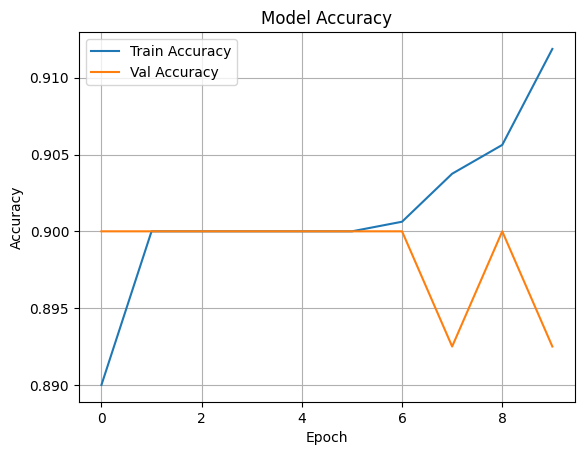

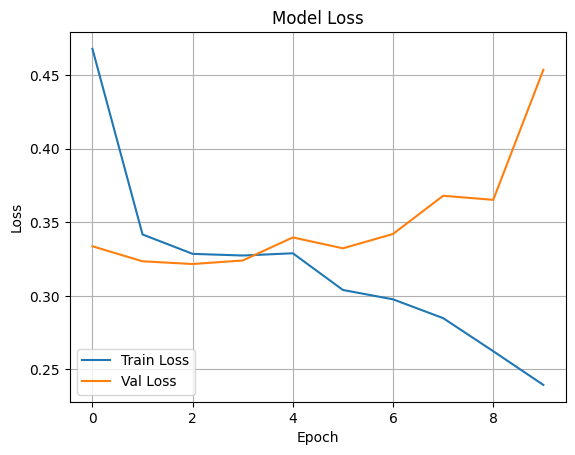

In [8]:
# Step 7: Visualize Accuracy and Loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


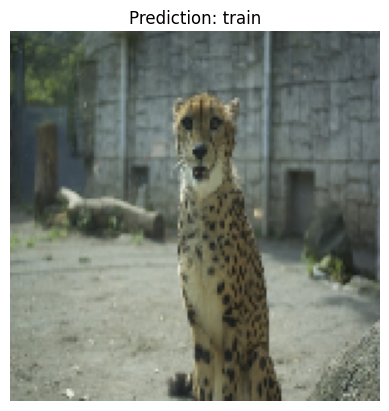

In [9]:
# Step 8: Visualize Sample Prediction
import numpy as np

class_labels = list(train_gen.class_indices.keys())

for images, labels in val_gen:
    sample = images[0]
    pred = model.predict(sample.reshape(1, 150, 150, 3))[0][0]
    plt.imshow(sample)
    plt.title(f"Prediction: {class_labels[1] if pred > 0.5 else class_labels[0]}")
    plt.axis('off')
    plt.show()
    break